https://www.kaggle.com/code/omkaarp/house-prices-regression-techniques-submission

In [8]:
# train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
# test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

import pandas as pd
train_data = pd.read_csv("source/train.csv")
test_data = pd.read_csv("source/test.csv")

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\sarve\AppData\Local\Temp\ipykernel_23548\3473599567.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(train_data.corr(), dtype=np.bool)
C:\Users\sarve\AppData\Local\Temp\ipykernel_23548\3473599567.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train_data.corr(), dtype=np.bool)
C:\Users\sarve\AppData\Local\Temp\ipykernel_23548\3473599567.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future versi

[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'MSSubClass'),
 Text(2.5, 0, 'LotFrontage'),
 Text(3.5, 0, 'LotArea'),
 Text(4.5, 0, 'OverallQual'),
 Text(5.5, 0, 'OverallCond'),
 Text(6.5, 0, 'YearBuilt'),
 Text(7.5, 0, 'YearRemodAdd'),
 Text(8.5, 0, 'MasVnrArea'),
 Text(9.5, 0, 'BsmtFinSF1'),
 Text(10.5, 0, 'BsmtFinSF2'),
 Text(11.5, 0, 'BsmtUnfSF'),
 Text(12.5, 0, 'TotalBsmtSF'),
 Text(13.5, 0, '1stFlrSF'),
 Text(14.5, 0, '2ndFlrSF'),
 Text(15.5, 0, 'LowQualFinSF'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'BsmtFullBath'),
 Text(18.5, 0, 'BsmtHalfBath'),
 Text(19.5, 0, 'FullBath'),
 Text(20.5, 0, 'HalfBath'),
 Text(21.5, 0, 'BedroomAbvGr'),
 Text(22.5, 0, 'KitchenAbvGr'),
 Text(23.5, 0, 'TotRmsAbvGrd'),
 Text(24.5, 0, 'Fireplaces'),
 Text(25.5, 0, 'GarageYrBlt'),
 Text(26.5, 0, 'GarageCars'),
 Text(27.5, 0, 'GarageArea'),
 Text(28.5, 0, 'WoodDeckSF'),
 Text(29.5, 0, 'OpenPorchSF'),
 Text(30.5, 0, 'EnclosedPorch'),
 Text(31.5, 0, '3SsnPorch'),
 Text(32.5, 0, 'ScreenPorch'),
 Text(33.5, 0, 'Poo

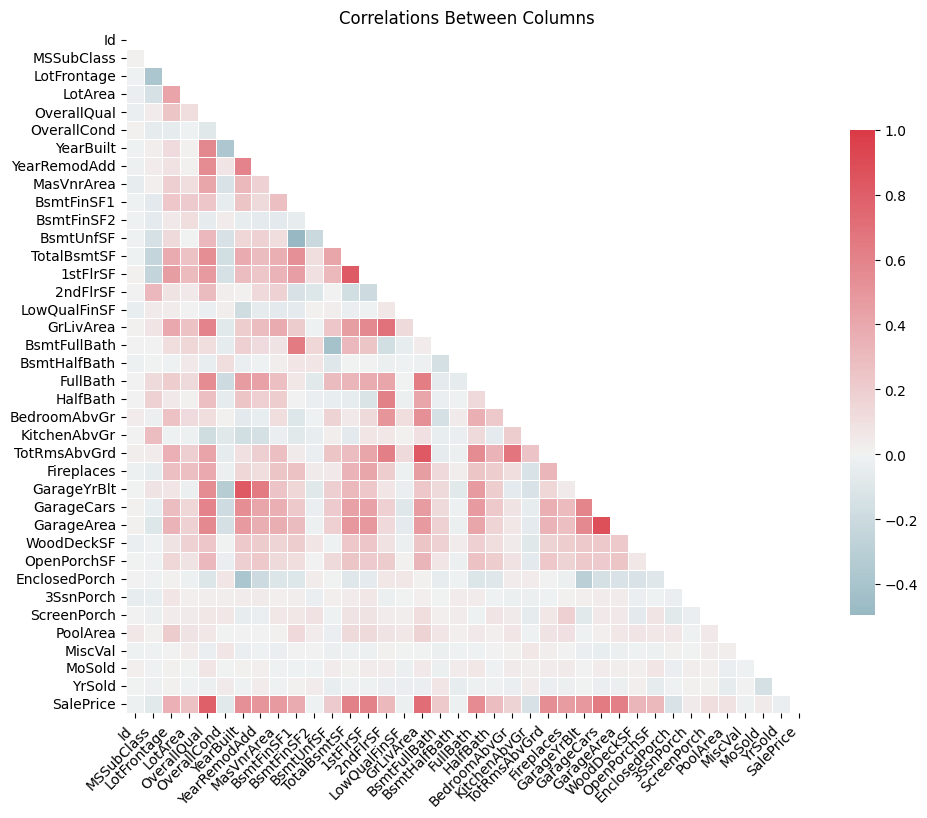

In [12]:
# Generate a mask for the upper triangle
import numpy as np
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
# display(data.corr())
mask[np.triu_indices_from(mask)] = True

# applying one more mask to hide those corr() cells from corr_matrix for which value is <0.75
corr_matrix = train_data.corr()
corr_matrix = corr_matrix >=  0.75
# display(corr_matrix)
    
# Set up the matplotlib figure
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Correlations Between Columns")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(20, 220, n=400)

# plotting the corr_matrix
import seaborn as sns
ax = sns.heatmap(train_data.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

'highly correlated features: '

5 cells, means 5 columns are highly correlated to other 5 cols, and thus one copy of 5 cols can be removed.


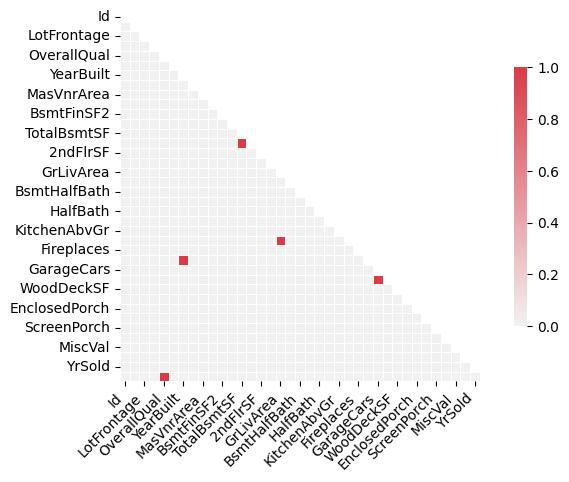

In [14]:
# plotting the corr_matrix where cell>=0.75
display('highly correlated features: ')
import seaborn as sns
ax = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
print('5 cells, means 5 columns are highly correlated to other 5 cols, and thus one copy of 5 cols can be removed.')

In [16]:
y = train_data.SalePrice
X = train_data.drop(columns=["SalePrice"], axis=1)

In [17]:
y.shape, X.shape, test_data.shape

((1460,), (1460, 80), (1459, 80))

In [18]:
corr_matrix = train_data.corr()

C:\Users\sarve\AppData\Local\Temp\ipykernel_23548\624221814.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


In [19]:
corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.40) | (corr_matrix["SalePrice"] < -0.40)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [22]:
important_num_cols = list(corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.5) | (corr_matrix["SalePrice"] < -0.5)].index)

important_num_cols.remove('SalePrice')
display(len(important_num_cols))
display(important_num_cols)

10

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [23]:
X_num_only = X[important_num_cols]
X_num_only.shape

(1460, 10)

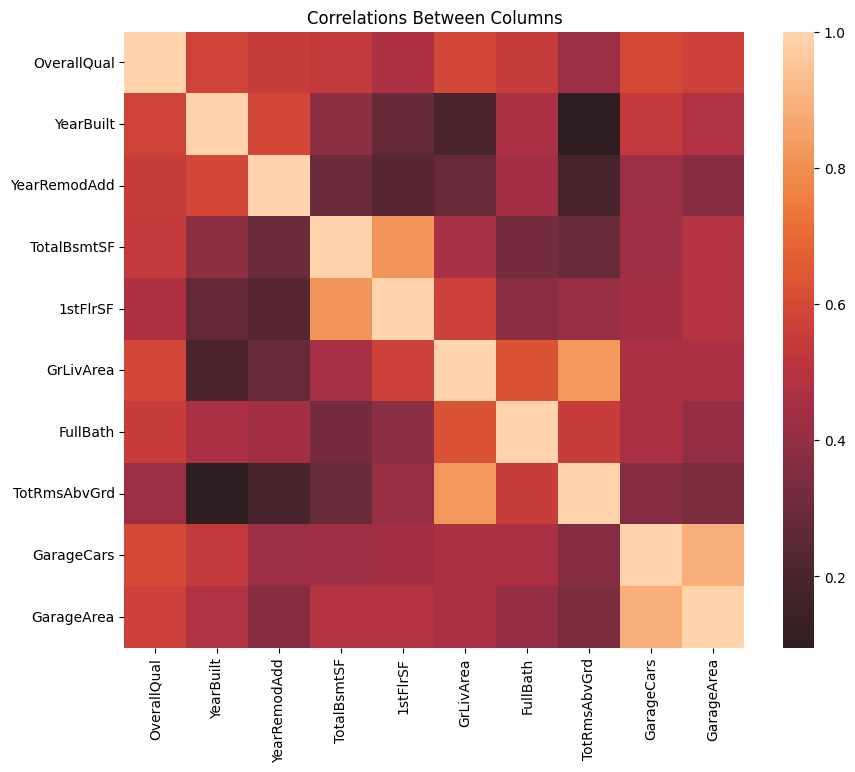

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(X_num_only.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [25]:
corr_X = X_num_only.corr()
len(corr_X)

10

In [26]:
for i in range(0, len(corr_X) - 1):
    for j in range(i + 1, len(corr_X)):
        if(corr_X.iloc[i, j] < -0.6 or corr_X.iloc[i, j] > 0.6):
            print(corr_X.iloc[i, j], i, j, corr_X.index[i], corr_X.index[j])

0.6006707165907149 0 8 OverallQual GarageCars
0.8195299750050339 3 4 TotalBsmtSF 1stFlrSF
0.6300116462511148 5 6 GrLivArea FullBath
0.8254893743088425 5 7 GrLivArea TotRmsAbvGrd
0.882475414281462 8 9 GarageCars GarageArea


In [27]:
# Based on the above information, we further discard the features 1stFlrSF, FullBath, TotRmsAbvGrd, GarageArea
#num_cols = [i for i in X_modified.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
num_cols = [i for i in X_num_only.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]

In [28]:
# Categorical columns - choose the important ones

cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

In [29]:
X_final = X[num_cols]

In [30]:
X_final.shape

(1460, 6)

In [32]:
X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']
X_final.head()

C:\Users\sarve\AppData\Local\Temp\ipykernel_23548\2167267753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars
0,7,2003,-2003,856,1710,2
1,6,1976,-1976,1262,1262,2
2,7,2001,-2000,920,1786,2
3,7,1915,-1860,756,1717,3
4,8,2000,-2000,1145,2198,3


In [33]:
X_final.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
GarageCars      0
dtype: int64

In [38]:
X_categorical_df = pd.get_dummies(X[cat_cols], columns=cat_cols)
X_categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1456,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1457,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1458,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [39]:
X_final = X_final.join(X_categorical_df)

In [40]:
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,-2003,856,1710,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,-1976,1262,1262,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,-2000,920,1786,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,-1860,756,1717,3,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,-2000,1145,2198,3,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,-1998,953,1647,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,-1968,1542,2073,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,-1876,1152,2340,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,-1904,1078,1078,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [41]:
from sklearn import preprocessing
standardize = preprocessing.StandardScaler().fit(X_final[num_cols])

In [42]:
#See mean per column
standardize.mean_

array([ 6.09931507e+00,  1.97126781e+03, -1.95766986e+03,  1.05742945e+03,
        1.51546370e+03,  1.76712329e+00])

In [44]:
#transform
X_final[num_cols] = standardize.transform(X_final[num_cols])
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-3.940503,-65.255046,38.415420,-2.412214,-2.884242,-1.948171,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-4.463688,-65.284665,38.425826,-2.410103,-2.885865,-1.948171,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,-3.940503,-65.257240,38.416576,-2.411881,-2.883966,-1.948171,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,-3.940503,-65.351581,38.470534,-2.412734,-2.884216,-0.156368,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,-3.417318,-65.258337,38.416576,-2.410712,-2.882473,-0.156368,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-4.463688,-65.259434,38.417347,-2.411710,-2.884470,-1.948171,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,-4.463688,-65.282471,38.428909,-2.408647,-2.882926,-1.948171,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,-3.940503,-65.323059,38.464367,-2.410675,-2.881959,-3.739973,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,-4.986874,-65.313186,38.453576,-2.411060,-2.886532,-3.739973,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [45]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-3.940503,-65.255046,38.415420,-2.412214,-2.884242,-1.948171,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-4.463688,-65.284665,38.425826,-2.410103,-2.885865,-1.948171,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,-3.940503,-65.257240,38.416576,-2.411881,-2.883966,-1.948171,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,-3.940503,-65.351581,38.470534,-2.412734,-2.884216,-0.156368,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,-3.417318,-65.258337,38.416576,-2.410712,-2.882473,-0.156368,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [46]:
# Split training data into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=1)

In [47]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 37), (292, 37), (1168,), (292,))

# Regression Using Machine Learning

In [52]:
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [53]:
perf = []
method = []

In [54]:
from sklearn.metrics import mean_squared_log_error

In [55]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
method.append('Linear Regression')
perf.append(rmsle)

R2 Score: 0.7670082797567433
RMSLE: 0.21036228385828878


In [64]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Ridge Regression')

rmsle = np.sqrt(mean_squared_log_error(np.abs(predictions), y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.6007998025859187
RMSLE: 0.25687592732163167


In [65]:
# Ridge regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Lasso Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.7627612649750815
RMSLE: 0.2141189640159477


In [66]:
# support vector regression
from sklearn.svm import SVR
svr = SVR(C=1000000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
#method.append('SVM')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
#perf.append(rmsle)

R2 Score: 0.1657894980180451
RMSLE: 0.23314038718810406


In [67]:
svr_rbf = SVR(kernel="rbf", C=1000000, gamma=0.01, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
predictions = svr_rbf.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)

method.append('SVR')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.6346798140067451
RMSLE: 0.2054660835692309


In [68]:
#Random forest regressor
for i in range(50 , 500, 50):
    random_forest = RandomForestRegressor(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predictions = random_forest.predict(X_val)

    r_squared = r2_score(predictions, y_val)

    print("R2 Score:", r_squared)
    method.append('Random Forest Regressor')
    rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
    print("RMSLE:", rmsle)
    perf.append(rmsle)

R2 Score: 0.8794884193028883
RMSLE: 0.15309768556626874
R2 Score: 0.8721043659290943
RMSLE: 0.15516696937036442
R2 Score: 0.8712638964433437
RMSLE: 0.15492503073822314
R2 Score: 0.8779687548868427
RMSLE: 0.15676840424408914
R2 Score: 0.8738414625600108
RMSLE: 0.1556311320762929
R2 Score: 0.8716885167110691
RMSLE: 0.15486942557482694
R2 Score: 0.8772953964710437
RMSLE: 0.1558567390593153
R2 Score: 0.874059802476471
RMSLE: 0.15481857565120283
R2 Score: 0.8702680159375656
RMSLE: 0.15593685441622046


In [69]:
# xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('XGBoost Regressor')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.8821318978070191
RMSLE: 0.1541770132154462


Alternatively: Using LazyRegressor to compare all the models

In [ ]:
! pip install lazypredict

In [77]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)
print(models)

100%|██████████| 42/42 [00:52<00:00,  1.24s/it]

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
GradientBoostingRegressor                    0.90       0.91   25203.81   
RandomForestRegressor                        0.89       0.90   26516.43   
XGBRegressor                                 0.88       0.89   27418.19   
BaggingRegressor                             0.88       0.89   27803.00   
ExtraTreesRegressor                          0.87       0.89   28222.64   
PoissonRegressor                             0.87       0.89   28297.28   
HistGradientBoostingRegressor                0.86       0.88   29397.97   
LGBMRegressor                                0.86       0.88   29539.61   
AdaBoostRegressor                            0.83       0.85   32869.86   
LassoCV                                      0.81       0.84   34077.30   
LassoLarsCV                                  0.81       0.84   34077.37   
LarsCV                   

In [ ]:
# No submission code_block was there
# so lets try a diff submissor's NB